<a href="https://colab.research.google.com/github/pranamyasin/projects/blob/main/Passenger_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from io import StringIO
import requests
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Import

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/collab/AirPassengers.csv',header = None)
data

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.rename(columns = {0:'time', 1:'travellers'}, inplace = True)
data

,time,travellers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.describe()

,travellers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        144 non-null    object
 1   travellers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


# Preprocessing

In [ ]:
print("min_date = " ,data['time'].min())
print("max_date = " ,data['time'].max())

min_date =  1949-01
max_date =  1960-12


In [ ]:
data['year_month'] = pd.to_datetime(data['time'], format='%Y-%m')
data.drop('time', axis = 1, inplace = True)
data

,travellers,year_month
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01
...,...,...
139,606,1960-08-01
140,508,1960-09-01
141,461,1960-10-01
142,390,1960-11-01


In [ ]:
len(data['year_month'].value_counts())

144

In [ ]:
data.isnull().sum()

travellers    0
year_month    0
dtype: int64

In [ ]:
data = data.set_index('year_month')
data

,travellers
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


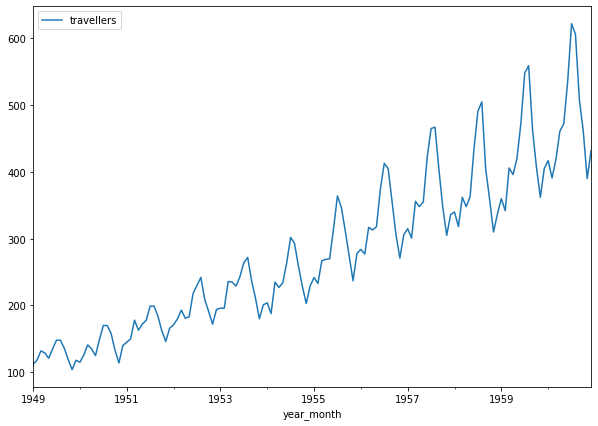

In [ ]:
data.plot(figsize = (10,7))

In [ ]:
# WITH THE PLOT THE TREND IS PRESENT

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


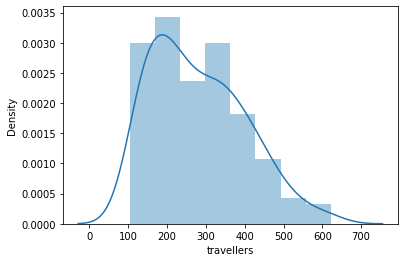

In [ ]:
sns.distplot(data['travellers'])

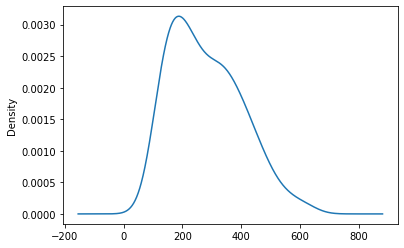

In [ ]:
data['travellers'].plot(kind = 'kde')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


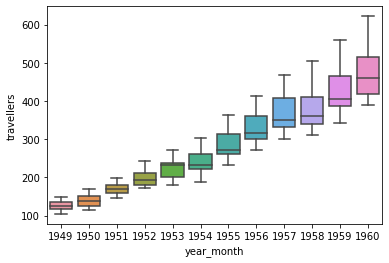

In [ ]:
sns.boxplot(data['travellers'].index.year, data['travellers'], )

In [ ]:
X = data["travellers"].values            #For futher confirmation 
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary") 

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


In [ ]:
#Staionairity is not present in the graph

# Decomposition

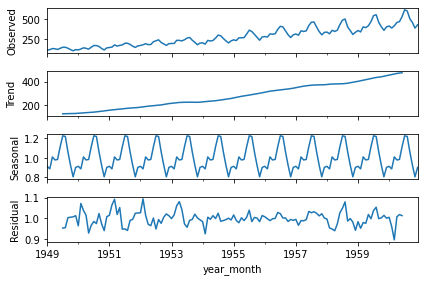

In [ ]:
decom = sm.tsa.seasonal_decompose(data, model = 'multiplicative')
decom.plot()
plt.show()

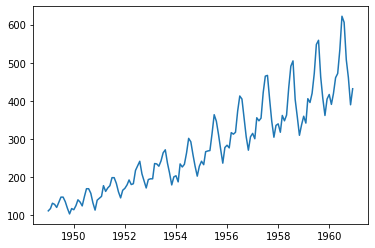

In [ ]:
plt.plot(data)

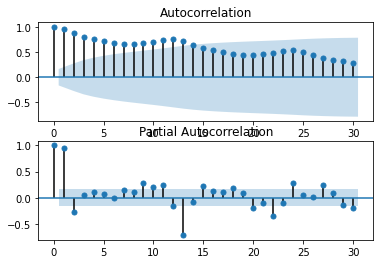

In [ ]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(data['travellers'], ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(data['travellers'], ax=pyplot.gca(), lags = 30)
pyplot.show()

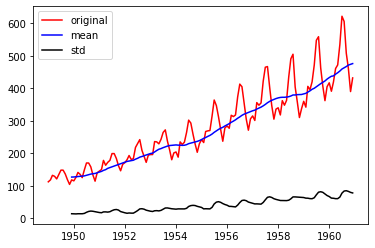

In [ ]:
mean = data.rolling(12).mean()
std = data.rolling(12).std()

plt.plot(data, color = 'red', label = 'original')
plt.plot(mean, color = 'blue', label = 'mean')
plt.plot(std, color = 'black', label = 'std')
plt.legend()
plt.show()

In [ ]:
train_data= data['travellers']-data['travellers'].shift(1)

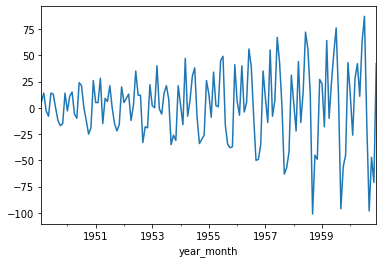

In [ ]:
train_data.dropna().plot()

In [ ]:
#Detrend is done inorder to gain the constant mean

In [ ]:
d = q = range(0,2)  
p = range(0,4)

In [ ]:
pdq= list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1)]

In [ ]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]          

In [ ]:
print("ARIMAX: {} X {}".format(pdq[1],seasonal_pdq[1]))

ARIMAX: (0, 0, 1) X (0, 0, 1, 12)


# SRIMAX MODEL AT MIN AIC

In [ ]:
warnings.filterwarnings("ignore")
AIC = [] #Alkaline Information Curve==> It define accuracy of DATA and how to predict the future data
         # AIC is used to give best accuracy by using minimum features
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                           order=param,
                                           seasonal_order=param_seasonal) 
            results = mod.fit()
            
            print("SARIMAX{}x{} = AIC:{}".format(param, param_seasonal, results.aic), end="\r" )
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [ ]:
#SMALLEST AIC
print("The smallest AIC {} for model SARIMAX {} x {}".format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC 1013.1023463498354 for model SARIMAX (2, 1, 1) x (2, 1, 1, 12)


In [28]:
SARIMAX_model[AIC.index(min(AIC))][0]

(2, 1, 1)

In [29]:
min(AIC)

1013.1023463498354

In [30]:
AIC.index(min(AIC))

180

In [31]:
SARIMAX_model[180]

[(2, 1, 1), (2, 1, 1, 12)]

In [32]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [33]:
results = mod.fit()

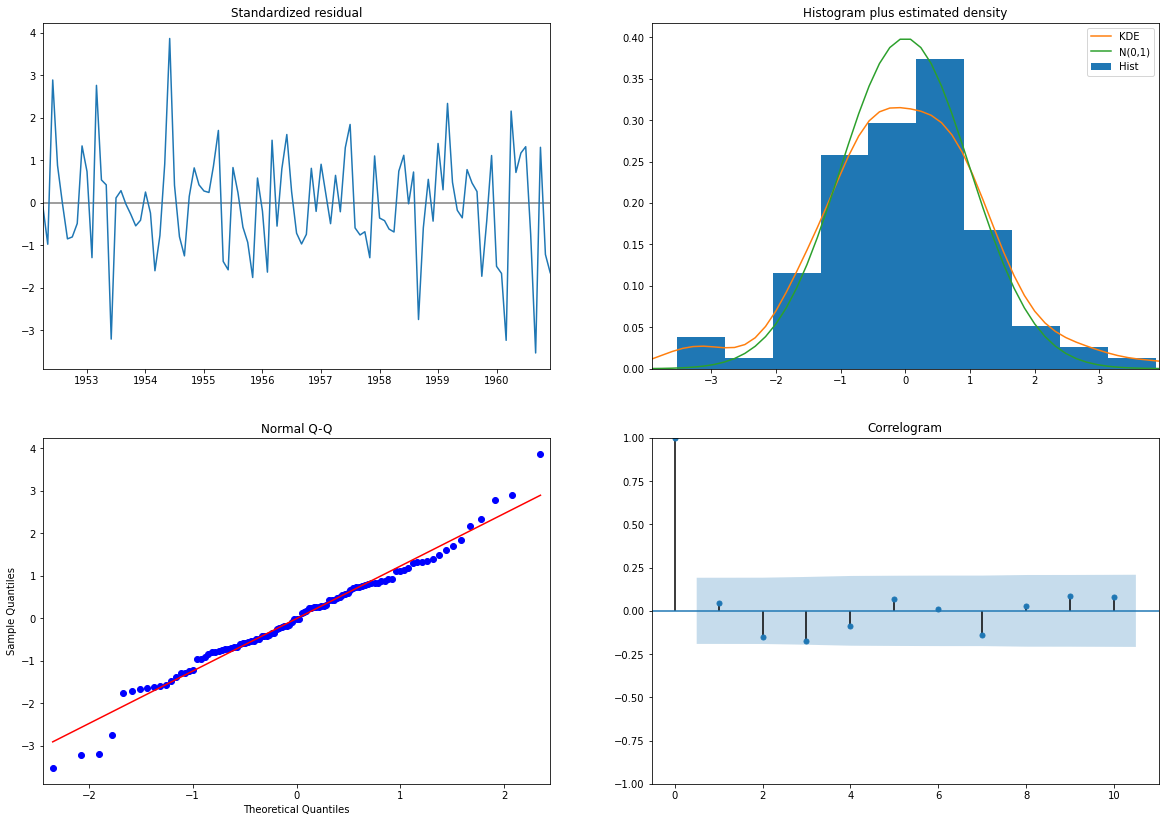

In [34]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

# Predictions

In [35]:
pred0 = results.get_prediction(start='1949-01-01', dynamic=False)
pred0_ci = pred0.conf_int()

In [36]:
pred1 = results.get_prediction(start='1949-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

In [37]:
pred2 = results.get_forecast('1962-01-01')
pred2_ci = pred2.conf_int()

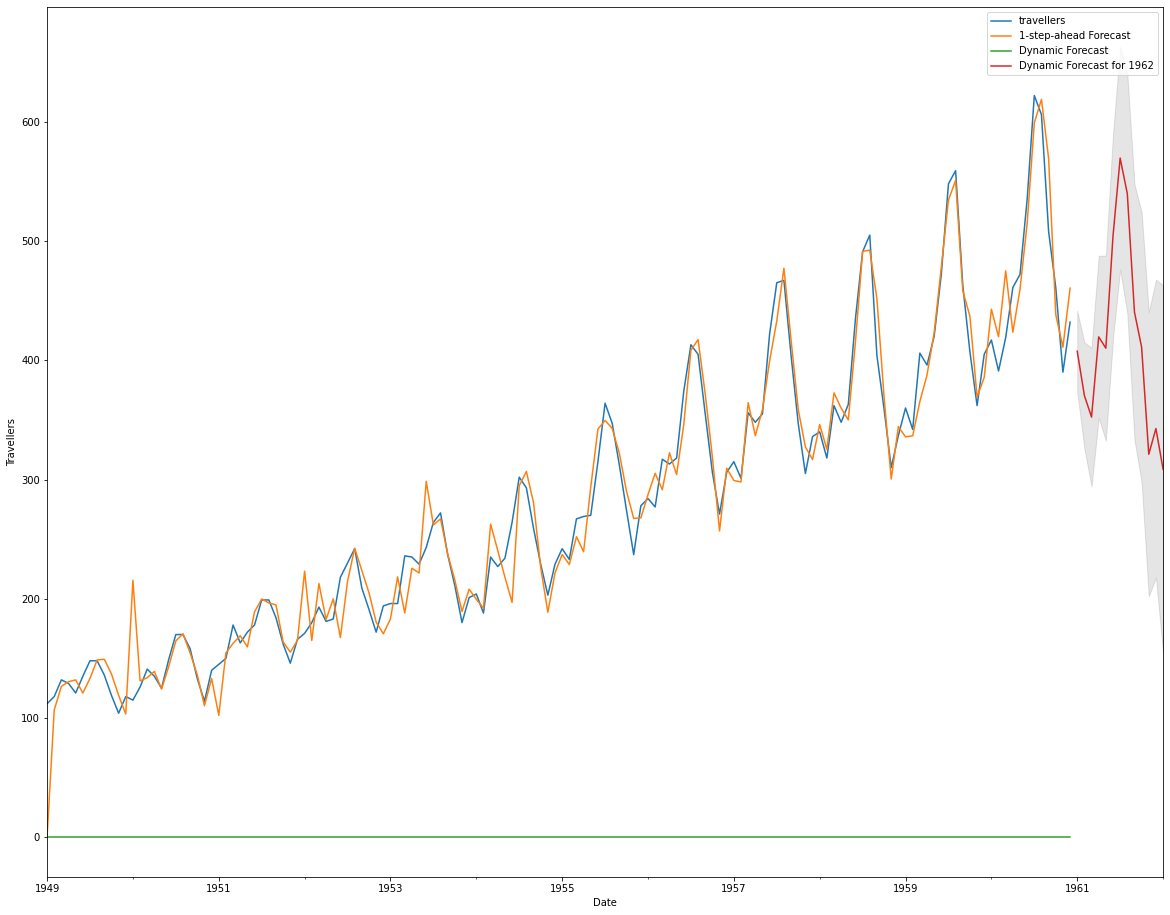

In [39]:
ax = data.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast for 1962')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Travellers')
plt.xlabel('Date')
plt.legend()
plt.show()

In [40]:
pred1

In [41]:
pred2_ci.head()

,lower travellers,upper travellers
1961-01-01,373.658119,441.571453
1961-02-01,325.851367,414.969383
1961-03-01,294.126257,410.579621
1961-04-01,351.664133,487.625575
1961-05-01,332.524270,487.734430


In [42]:
pred2_ci.iloc[:, 0].head()

1961-01-01    373.658119
1961-02-01    325.851367
1961-03-01    294.126257
1961-04-01    351.664133
1961-05-01    332.524270
Freq: MS, Name: lower travellers, dtype: float64

In [43]:
pred2_ci.iloc[:, 1].head()

1961-01-01    441.571453
1961-02-01    414.969383
1961-03-01    410.579621
1961-04-01    487.625575
1961-05-01    487.734430
Freq: MS, Name: upper travellers, dtype: float64

In [44]:
pred2_ci.index

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01'],
              dtype='datetime64[ns]', freq='MS')